# UCD Professional Academy Assessment

## Introduction
[The National Centers for Environment Information](https://www.ncei.noaa.gov) maintains one of the most significant archives on Earth, managing more than 30 petabytes of data and information that spans the entire spectrum of Earth’s environmental systems and cycles with comprehensive oceanic, atmospheric, and geophysical data.

The [Storm Events Database](https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ncdc:C00773) is an integrated database of severe weather events across the United States from 1950 to this year, with information about the occurrence of storms and other significant weather phenomena having sufficient intensity to cause loss of life, injuries, significant property damage, disruption to commerce.

This dataset allows identify the most severe storms and damage caused by them, as define correlations between the features that compose the dataset.

## Dataset
The datasets are provided via [bulk download](https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/).
There are 3 files linked by the event ID number. Details, locations and fatalities

* Events Details file: The storm event description and data captured
* Events Location file: The storm location data
* Event fatalities file: the fatalities related to the storm

The full descripiotn of all features as described [here](https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/Storm-Data-Bulk-csv-Format.pdf). The datasets relevants to this project are Storm details and fatalities file with the set of features described below:

### Event Details file
Named as `StormEvents_details-ftp_v1.0_dYYYY_cYYYYMMdd.csv` where dYYYY = data year and cYYYYMMdd = file creation date 

* `episode_id` Ex: 61280, 62777, 63250 ID assigned by NWS to denote the storm episode;
* `event_id` Ex: 383097, 374427, 364175 ID assigned by NWS for each individual storm event contained within a storm episode; links
the record with the same event in the storm_event_details, storm_event_locations and
storm_event_fatalities tables (Primary database key field).
* `state` Ex: GEORGIA, WYOMING, COLORADO The state name where the event occurred (no State ID’s are included here; State Name is spelled out in ALL CAPS).
* `year` Ex: 2000, 2006, 2012 The four digit year for the event in this record.
* `event_type` Ex: Hail, Thunderstorm Wind, Snow, Ice (spelled out; not abbreviated)
* `injuries_direct` Ex: 1, 0, 56
The number of injuries directly caused by the weather event.
* `injuries_indirect` Ex: 0, 15, 87
The number of injuries indirectly caused by the weather event.
* `deaths_direct` Ex: 0, 45, 23
The number of deaths directly caused by the weather event.
* `deaths_indirect` Ex: 0, 4, 6
The number of deaths indirectly caused by the weather event.
* `damage_property` Ex: 10.00K, 0.00K, 10.00M
The estimated amount of damage to property incurred by the weather event (e.g. 10.00K =
$10,000; 10.00M = $10,000,000)
* `damage_crops` Ex: 0.00K, 500.00K, 15.00M
The estimated amount of damage to crops incurred by the weather event (e.g. 10.00K =
$10,000; 10.00M = $10,000,000).
* `magnitude` Ex: 0.75, 60, 0.88, 2.75
The measured extent of the magnitude type ~ only used for wind speeds (in knots) and hail size
(in inches to the hundredth).
* `tor_f_scale` Ex: EF0, EF1, EF2, EF3, EF4, EF5
Enhanced Fujita Scale describes the strength of the tornado based on the amount and type of
damage caused by the tornado. The F-scale of damage will vary in the destruction area;
therefore, the highest value of the F-scale is recorded for each event.
|F-sccale|
|-----------------------------------------|
|EF0 – Light Damage (40 – 72 mph)|
|EF1 – Moderate Damage (73 – 112 mph)|
|EF2 – Significant damage (113 – 157 mph)|
|EF3 – Severe Damage (158 – 206 mph)|
|EF4 – Devastating Damage (207 – 260 mph)|
|EF5 – Incredible Damage (261 – 318 mph)|

* `tor_length` Ex: 0.66, 1.05, 0.48
Length of the tornado or tornado segment while on the ground (in miles to the tenth).
* `tor_width` Ex: 25, 50, 2640, 10

### Storm Data Fatality File 
Named `StormEvents_fatalities-ftp_v1.0_dYYYY_cYYYYMMdd.csv.gz` where dYYYY = data year and cYYYYMMdd = file creation date

* `fatality_id` Ex: 17582, 17590, 17597, 18222
ID assigned by NWS to denote the individual fatality that occurred)
* `event_id` Ex: 383097, 374427, 364175
ID assigned by NWS for each individual storm event contained within a storm episode; links the
record with the same event in the storm_event_details, storm_event_locations and
storm_event_fatalities tables (Primary database key field)
* `fatality_type` Ex: D , I
(D = Direct Fatality; I = Indirect Fatality; assignment of this is determined by NWS software;
details below are from NWS Directve 10-1605 at
http://www.nws.noaa.gov/directives/sym/pd01016005curr.pdf, Section 2.6)
* `fatality_date` Ex: 4/3/2012 00:00
MM/DD/YYYY hh:mm (time is usually 00.00)
* `fatality_age` Ex: 38, 25, 69, 54
The age in years of the fatality (sometimes ‘null’ if unknown)
* `fatality_sex` Ex: M, F
The gender of the fatality (sometimes ‘null’ if unknown)
* `fatality_location` Ex: UT, OU, MH, PS
|Direct Fatality Location Table|
|------------------------------|
|BF Ball Field|
|BO Boating|
|BU Business|
|CA Camping|
|CH Church|
|EQ Heavy Equip/Construction\
|GF Golfing|
|IW In Water|
|LS Long Span Roof|
|MH Mobile/Trailer Home|
|OT Other/Unknown|
|OU Outside/Open Areas|
|PH Permanent Home|
|PS Permanent Structure|
|SC School|
|TE Telephone|
|UT Under Tree|
|VE Vehicle and/or Towed Trailer|



## Implementation

### Downloading files

> **This section takes a bit of time, please wait until it completes downloading all datases**.

First all files needs to be downloaded from bulk download website. The website provides files from 1950 until current year, but for this experiment will be using just the 10 years of data, from 2011 to 2021. The library BeatifulSoup allows to scrape the website and download all csv datasets. The desired files have the extension as `.csv.gz` and a name pattern well defined. The files will be saved to datasets folder. 

In [ ]:
import re
import requests
from bs4 import BeautifulSoup


def scrape_website_for_download_link(url, regex):
    html_text = requests.get(bulk_url).text
    soup = BeautifulSoup(html_text,'html.parser')
    content = []
    for tag in soup.find_all(href=re.compile(regex)):
        tag_content = tag.get('href')
        content.append(tag_content)
    print("{} content found for url {} regex {}".format(len(content),url,regex))
    return content

def download_files_to_folder(download_url,files,destination_folder):
    print("Downloading {} files to {} folder".format(len(files),destination_folder))
    for file in files:
        r = requests.get("{}/{}".format(download_url,file),allow_redirects=True)
        with open("{}/{}".format(destination_folder,file), 'wb') as f:
            f.write(r.content)
    print("All files downloaded!")

bulk_url = 'https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles'
links = scrape_website_for_download_link(bulk_url,"StormEvents_(details|fatalities).*(d201[1-9]|d202[0-1]).*")
download_files_to_folder(bulk_url,links,"datasets")
 

22 content found for url https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles regex StormEvents_(details|fatalities).*(d201[1-9]|d202[0-1]).*


### Loading datasets into Pandas

> **This section takes a bit of time, please wait until it loads all datases**.

After downloading the datasets, they need to be loaded into Pandas Dataframe. As mentioned above, only a subset of features will be used.
The strategy is to join the Storm details and fatalities dataset for each year, and append to a parent dataset that will hold all data.

In [54]:
import pandas as pd
import gzip
import numpy as np
import glob

# define range of years
years = np.arange(2011,2022,1)

#find datasets at datases folder based on regex
def find_dataset(regex):
    return glob.glob("datasets/{}".format(regex))[0]

# load dataset into pandas DF from gzip
def load_df(file_path,columns):
    with gzip.open(file_path) as f:
        df = pd.read_csv(f, usecols=columns, low_memory=False)
    return df


def load_storm_dataset_data(pattern,columns):
    full_df = pd.DataFrame()
    for year in years:
        details_rgx = pattern.format(year)
        details_file_path = find_dataset(details_rgx)
        partial_df = load_df(details_file_path,columns)
        full_df = pd.concat([full_df,partial_df],axis="rows")
    return full_df


def merge(df_tuple,column):
    return pd.merge(df_tuple[0],df_tuple[1],how="left",on=[column])
  
details_rgx = "StormEvents_details*d{}*.csv.gz"
fatalities_rgx = "StormEvents_fatalities*d{}*.csv.gz"

storm_details_columns = ['EPISODE_ID','EVENT_ID','STATE','YEAR','EVENT_TYPE','INJURIES_DIRECT',
                         'INJURIES_INDIRECT','DEATHS_DIRECT','DEATHS_INDIRECT','DAMAGE_PROPERTY','DAMAGE_CROPS','MAGNITUDE','TOR_F_SCALE','TOR_LENGTH','TOR_WIDTH']

storm_fatalities_columns = ['FATALITY_ID','EVENT_ID','FATALITY_TYPE','FATALITY_DATE','FATALITY_AGE','FATALITY_SEX','FATALITY_LOCATION']

storm_details_df = load_storm_dataset_data(details_rgx,storm_details_columns)
storm_fatalities_df = load_storm_dataset_data(fatalities_rgx,storm_fatalities_columns)


### Cleaning Dataset

#### Damage values needs to be transformed to number


In [55]:
# formating damage values
def manage_damage_values(value):
    str_value = str(value)
    if str_value == 'nan':
        str_value = '0'
    elif str_value.endswith('B'):
        str_value = str_value.replace('B', ' * 1000000000')
    elif str_value.endswith('M'):
        str_value = str_value.replace('M', ' * 1000000')
    elif str_value.endswith('K'):
        str_value = str_value.replace('K', ' * 1000')
    elif str_value.endswith('H'):
        str_value = str_value.replace('H', ' * 1000')
    elif str_value.endswith('h'):
        str_value = str_value.replace('h', ' * 1000')
    else:
        str_value = str(float(str_value)) + ' * 1000'
    return eval(str_value)


storm_details_df['DAMAGE_PROPERTY'] = storm_details_df['DAMAGE_PROPERTY'].apply(manage_damage_values)
storm_details_df['DAMAGE_CROPS'] = storm_details_df['DAMAGE_CROPS'].apply(manage_damage_values)


#### Infering the missing values for age at fatalaties dataset

In [56]:
storm_fatalities_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8996 entries, 0 to 976
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FATALITY_ID        8996 non-null   int64  
 1   EVENT_ID           8996 non-null   int64  
 2   FATALITY_TYPE      8996 non-null   object 
 3   FATALITY_DATE      8986 non-null   object 
 4   FATALITY_AGE       7156 non-null   float64
 5   FATALITY_SEX       7724 non-null   object 
 6   FATALITY_LOCATION  8996 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 562.2+ KB


In [57]:
storm_fatalities_df[['FATALITY_AGE','FATALITY_SEX']].isnull().sum()

FATALITY_AGE    1840
FATALITY_SEX    1272
dtype: int64

In [58]:
storm_fatalities_df['FATALITY_AGE'] = storm_fatalities_df['FATALITY_AGE'].fillna(storm_fatalities_df['FATALITY_AGE'].mean())

In [59]:
storm_fatalities_df[['FATALITY_AGE','FATALITY_SEX']].isnull().sum()

FATALITY_AGE       0
FATALITY_SEX    1272
dtype: int64

#### Infering missing values for 'MAGNITUDE','TOR_F_SCALE','TOR_LENGTH','TOR_WIDTH'


In [60]:
storm_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686781 entries, 0 to 61001
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   EPISODE_ID         686781 non-null  int64  
 1   EVENT_ID           686781 non-null  int64  
 2   STATE              686781 non-null  object 
 3   YEAR               686781 non-null  int64  
 4   EVENT_TYPE         686781 non-null  object 
 5   INJURIES_DIRECT    686781 non-null  int64  
 6   INJURIES_INDIRECT  686781 non-null  int64  
 7   DEATHS_DIRECT      686781 non-null  int64  
 8   DEATHS_INDIRECT    686781 non-null  int64  
 9   DAMAGE_PROPERTY    686781 non-null  float64
 10  DAMAGE_CROPS       686781 non-null  float64
 11  MAGNITUDE          361867 non-null  float64
 12  TOR_F_SCALE        15070 non-null   object 
 13  TOR_LENGTH         15070 non-null   float64
 14  TOR_WIDTH          15070 non-null   float64
dtypes: float64(5), int64(7), object(3)
memory usage: 83.

In [61]:
storm_details_df['MAGNITUDE'] = storm_details_df['MAGNITUDE'].fillna(0)
storm_details_df['TOR_LENGTH'] = storm_details_df['TOR_LENGTH'].fillna(0)
storm_details_df['TOR_WIDTH'] = storm_details_df['TOR_WIDTH'].fillna(0)

In [62]:
storm_details_df['TOR_F_SCALE'] = storm_details_df['TOR_F_SCALE'].fillna(-1)

In [63]:
storm_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686781 entries, 0 to 61001
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   EPISODE_ID         686781 non-null  int64  
 1   EVENT_ID           686781 non-null  int64  
 2   STATE              686781 non-null  object 
 3   YEAR               686781 non-null  int64  
 4   EVENT_TYPE         686781 non-null  object 
 5   INJURIES_DIRECT    686781 non-null  int64  
 6   INJURIES_INDIRECT  686781 non-null  int64  
 7   DEATHS_DIRECT      686781 non-null  int64  
 8   DEATHS_INDIRECT    686781 non-null  int64  
 9   DAMAGE_PROPERTY    686781 non-null  float64
 10  DAMAGE_CROPS       686781 non-null  float64
 11  MAGNITUDE          686781 non-null  float64
 12  TOR_F_SCALE        686781 non-null  object 
 13  TOR_LENGTH         686781 non-null  float64
 14  TOR_WIDTH          686781 non-null  float64
dtypes: float64(5), int64(7), object(3)
memory usage: 83.

### Analysing Dataset

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
diverging_colors = sns.color_palette("RdBu", 10)
sns.set_palette(diverging_colors)

#### Distribution of events and damage
Infer the distribution of events and the damage that they have caused. To apply the calculation of total damaged, a sum of `damage_crops` and `damage_property` will assigned as a new column called `damage_total`. The results will be filtered by states that had more than 10k events and damage values greater than a billion


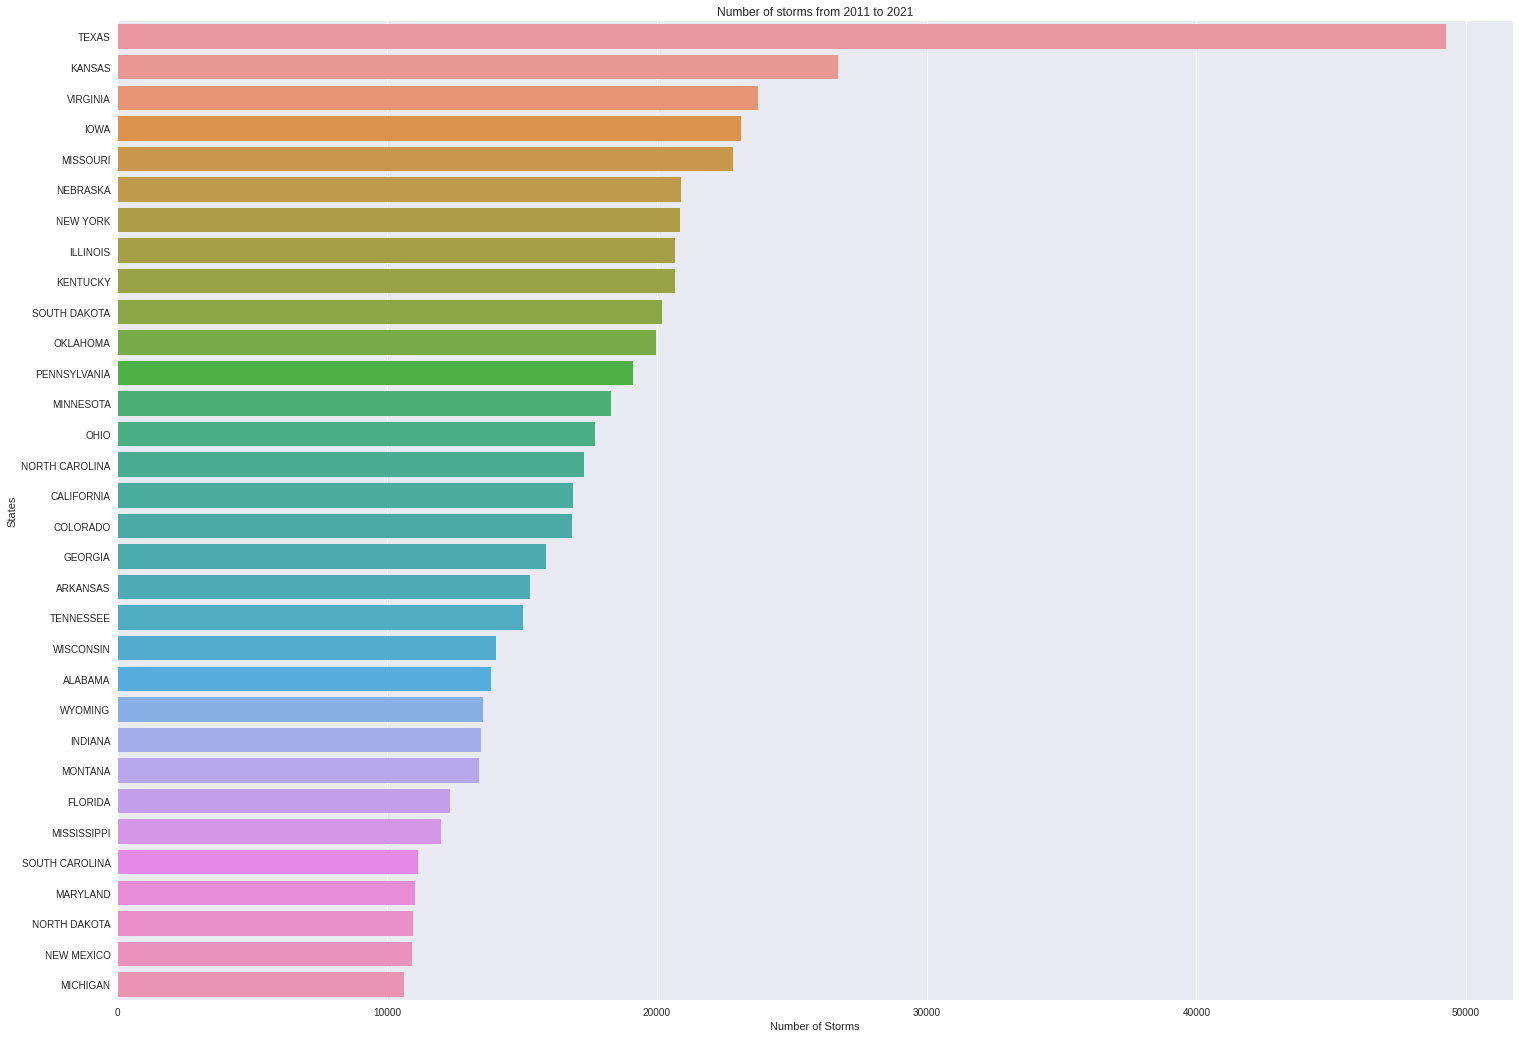

In [67]:
# storm by event type
storm_by_state =storm_details_df.groupby('STATE')['EVENT_ID'].nunique().reset_index()
storm_by_state = storm_by_state.query('EVENT_ID > 10000')

plt.figure(figsize=(25,18))
plt.ticklabel_format(style='plain', axis='x')
ax = sns.barplot(y='STATE', x='EVENT_ID', data=storm_by_state, order=storm_by_state.sort_values('EVENT_ID', ascending=False).STATE, ci=None)
ax.set(ylabel='States',
       xlabel='Number of Storms',
       title='Number of storms from {} to {}'.format(years[0],years[-1]));
plt.savefig('number_of_storms_by_state.png')


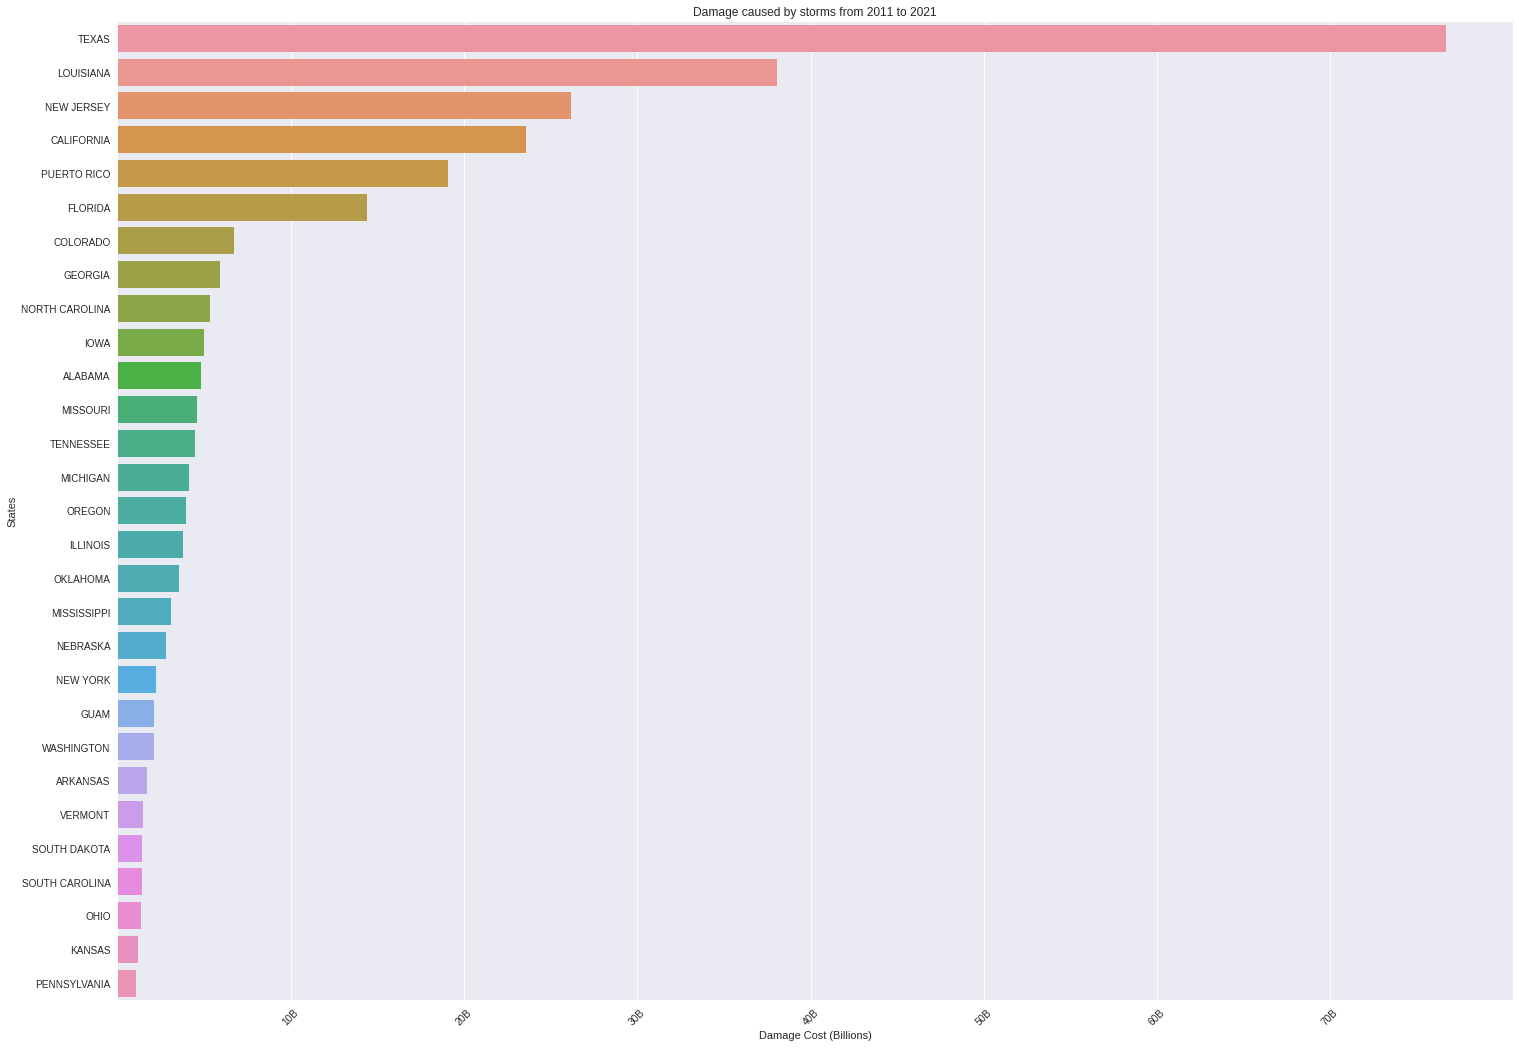

In [68]:
#damage by state
storm_details_df['DAMAGE_TOTAL'] = storm_details_df['DAMAGE_CROPS'] + storm_details_df['DAMAGE_PROPERTY']

damage_by_state = storm_details_df.groupby(['STATE'])['DAMAGE_TOTAL'].agg('sum').reset_index()
damage_by_state = damage_by_state.query('DAMAGE_TOTAL > 1000000000')

def to_billions(value):
    return value * (10**9)

x_labels = np.arange(10,71,10)


plt.figure(figsize=(25,18))
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(to_billions(x_labels), ['10B', '20B','30B','40B','50B','60B','70B'],rotation=45)
ax = sns.barplot(y='STATE', x='DAMAGE_TOTAL', data=damage_by_state, order=damage_by_state.sort_values('DAMAGE_TOTAL', ascending=False).STATE, ci=None)
ax.set(ylabel='States',
       xlabel='Damage Cost (Billions)',
       title='Damage caused by storms from {} to {}'.format(years[0],years[-1]));
plt.savefig('damage_by_state.png')


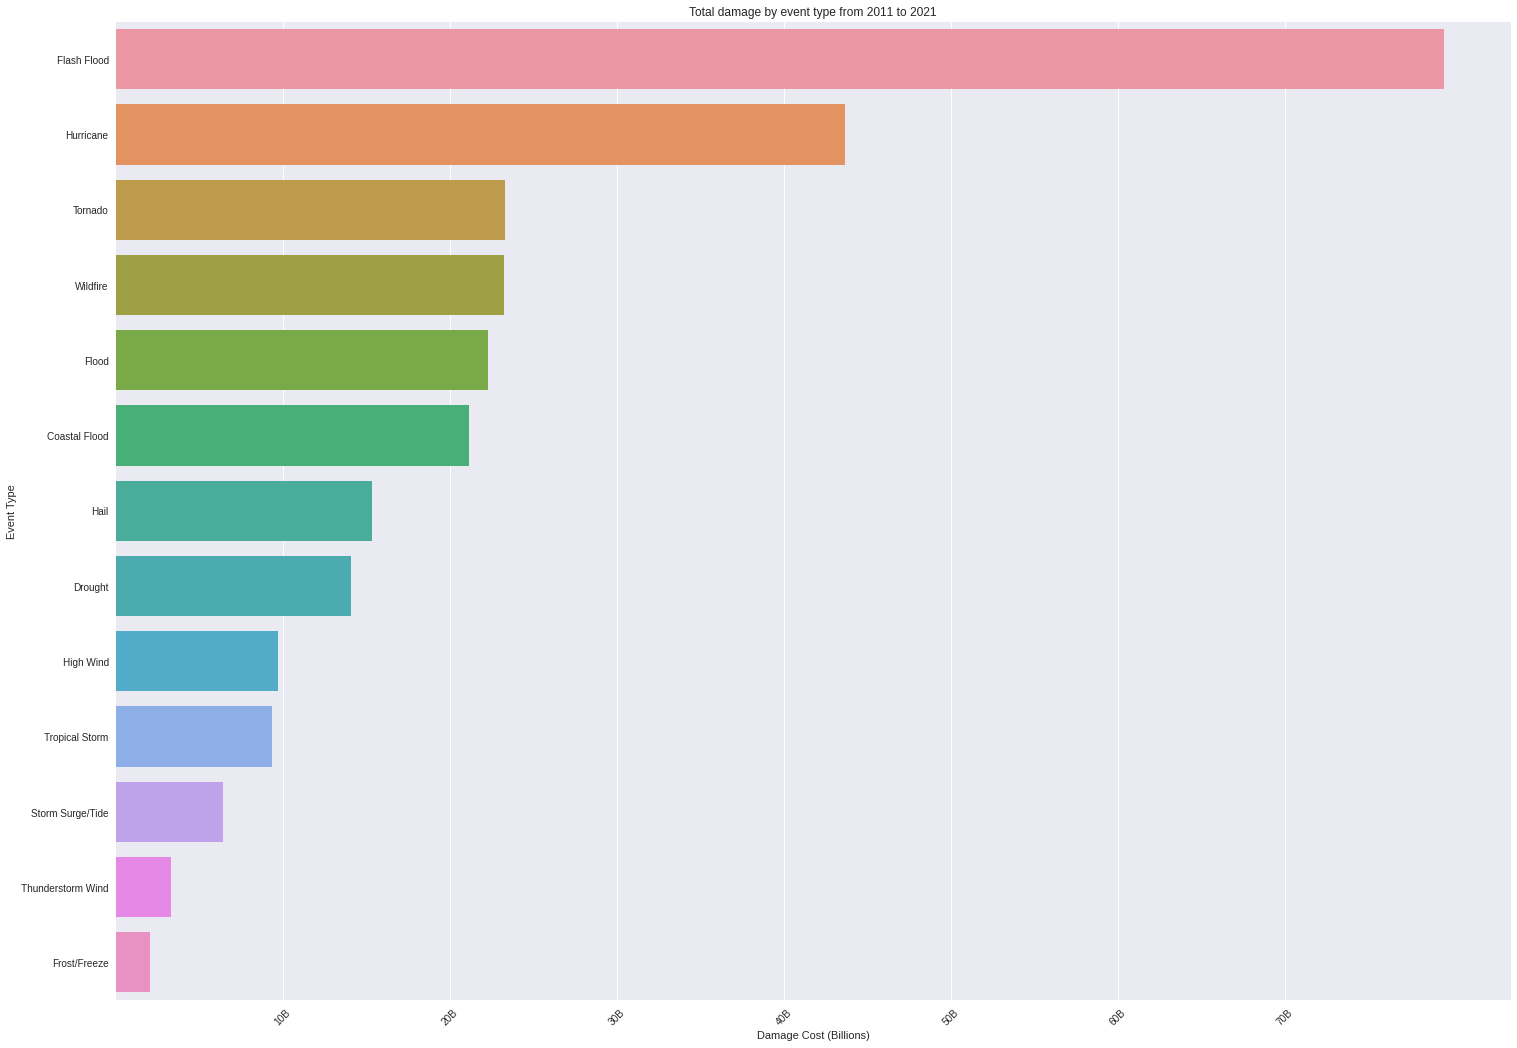

In [69]:
# damage by event
damage_by_event = storm_details_df.groupby(['EVENT_TYPE'])['DAMAGE_TOTAL'].agg('sum').reset_index()
damage_by_event= damage_by_event.query('DAMAGE_TOTAL > 1000000000')


plt.figure(figsize=(25,18))
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(to_billions(x_labels), ['10B', '20B','30B','40B','50B','60B','70B'],rotation=45)
ax = sns.barplot(y='EVENT_TYPE', x='DAMAGE_TOTAL', data=damage_by_event, order=damage_by_event.sort_values('DAMAGE_TOTAL', ascending=False).EVENT_TYPE, ci=None)
ax.set(ylabel='Event Type',
       xlabel='Damage Cost (Billions)',
       title='Total damage by event type from {} to {}'.format(years[0],years[-1]));
plt.savefig('damage_by_event.png')

> **Texas** is by far the state with more events and damage caused by storms, with more than 70 billions in damage in the past 10 years. The event that causes more damage is **Flash Flood** with more than 75 billions in damage.



#### Distribution of event types, injuries and deaths
Present the number of event types and how life threatening they are. Again, a summary of `injuries_direct` and `injuries_indirect` and `deaths_direct` and `deaths_indirect` is needed for the calculation.  

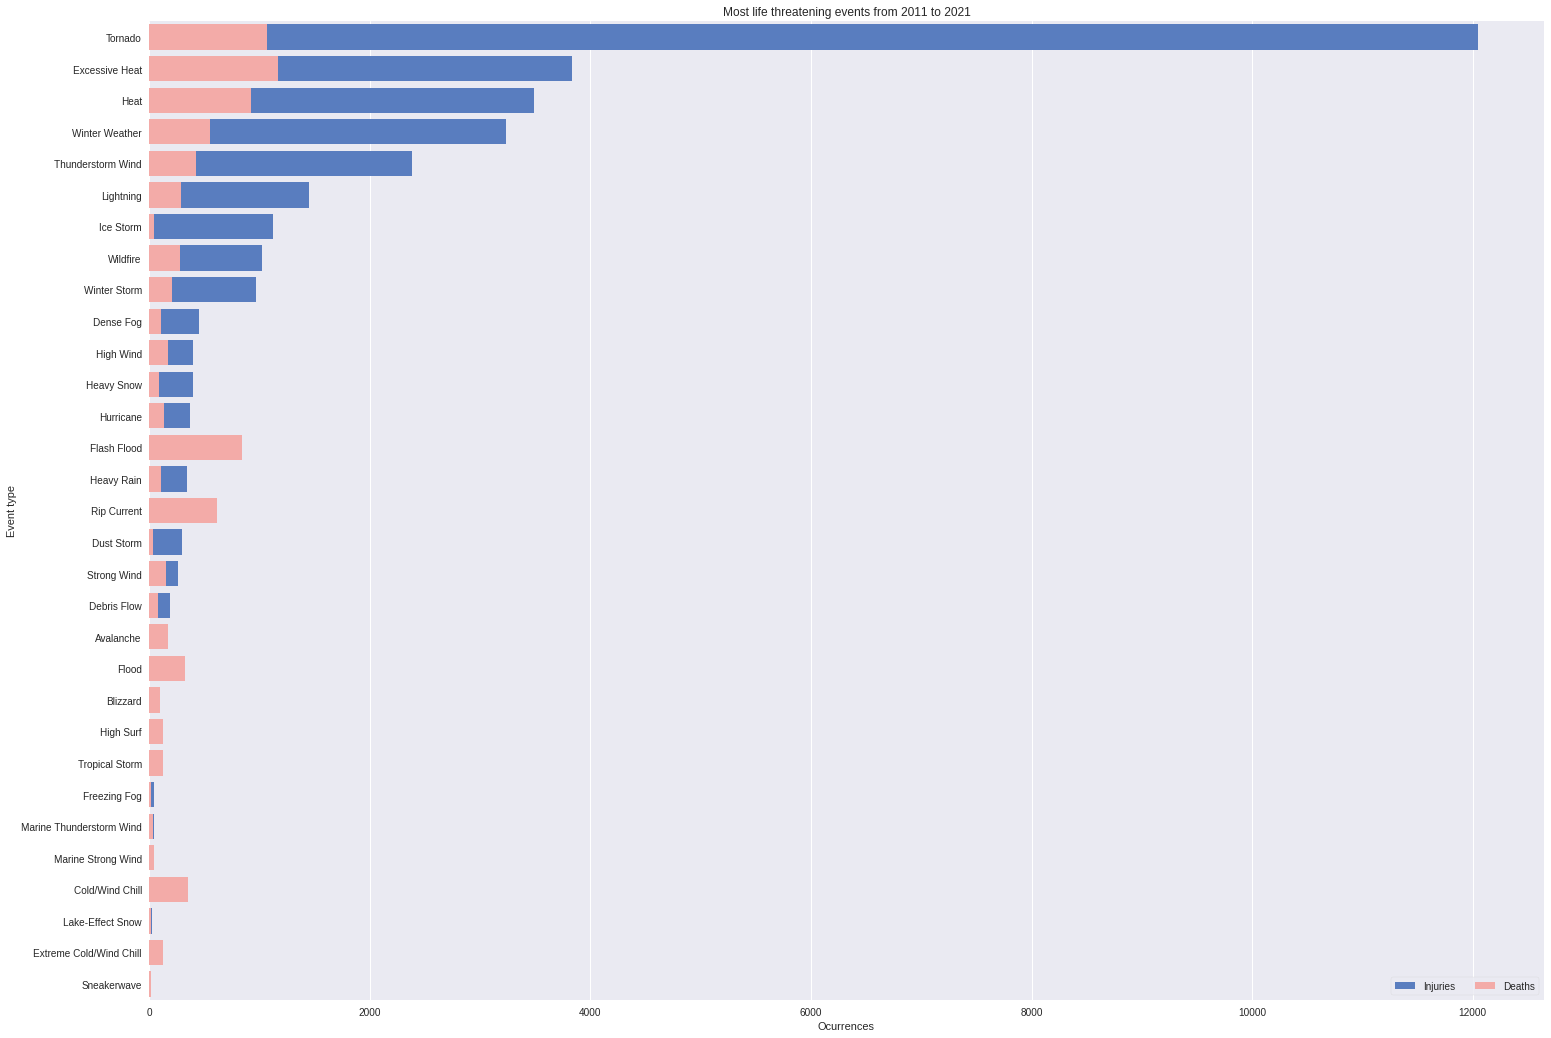

In [70]:
# life threatening events and numbers
storm_details_df['DEATH_TOTAL'] = storm_details_df['DEATHS_DIRECT'] + storm_details_df['DEATHS_INDIRECT']
storm_details_df['INJURIES_TOTAL'] = storm_details_df['INJURIES_DIRECT'] + storm_details_df['INJURIES_INDIRECT']

threat_by_event = storm_details_df.groupby(['EVENT_TYPE'])[['DEATH_TOTAL','INJURIES_TOTAL']].agg('sum').reset_index()
threat_by_event = threat_by_event.query('INJURIES_TOTAL > 10 and DEATH_TOTAL> 10')
threat_by_event.sort_values(["INJURIES_TOTAL", "DEATH_TOTAL"], 
               axis = 0, ascending = False, 
               inplace = True)


f, ax = plt.subplots(figsize=(25, 18))

sns.set_color_codes("muted")
sns.barplot(x="INJURIES_TOTAL", y="EVENT_TYPE", data=threat_by_event,label="Injuries", color="b")


sns.set_color_codes("pastel")
sns.barplot(x="DEATH_TOTAL", y="EVENT_TYPE", data=threat_by_event,label="Deaths", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)

ax.set(ylabel='Event type',
        xlabel='Ocurrences',
        title='Most life threatening events from {} to {}'.format(years[0],years[-1]));
sns.despine(left=True, bottom=True)
plt.savefig('life_threatening_events.png')

#### Merging Fatalities Datasets with subset features from Storm Details
In order to present the distribution of deaths related event types, fatalities dataset needs to be merged with storm events dataset. Only the `event_id` and `event_type` columns are needed. The result will be filtered by top 5 deadlyiest event. 

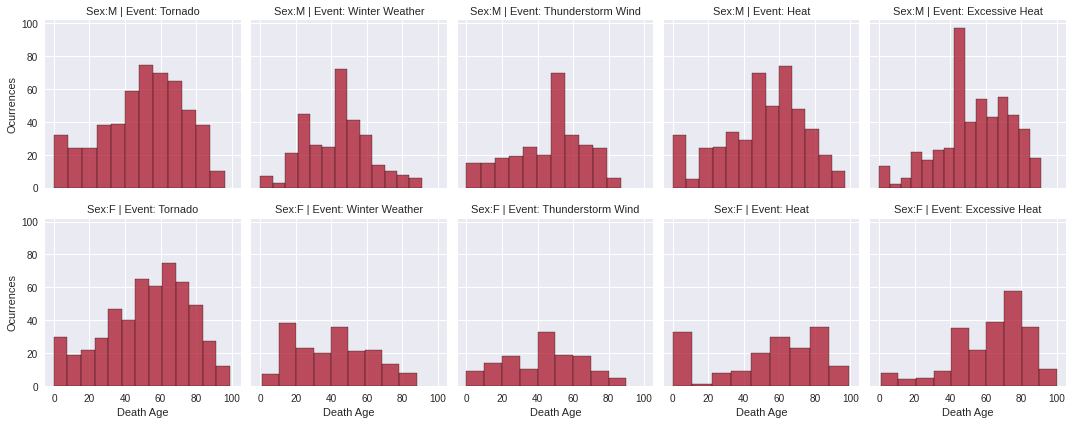

In [71]:
# extract types and events, merge
sub_df = storm_details_df[['EVENT_ID','EVENT_TYPE']]
storm_ft_df = merge((storm_fatalities_df,sub_df), "EVENT_ID")

top_5_indices = threat_by_event['EVENT_TYPE'].unique()[:5]

top_5_events = storm_ft_df.query('EVENT_TYPE in @top_5_indices')

#distribuition of deaths by age and sex
sns.set_color_codes("pastel")

g = sns.FacetGrid(top_5_events, col="EVENT_TYPE",  row="FATALITY_SEX")
g.map_dataframe(sns.histplot, x="FATALITY_AGE")

g.set_axis_labels("Death Age", "Ocurrences")
g.set_titles(col_template="Event: {col_name}", row_template="Sex:{row_name}")
g.tight_layout()
g.savefig("death_by_event_and_age.png")


> **Tornados, Winter Weather, Thunderstorm Winds, Heat and Excessive Heat** are the events that caused more deaths, with **Heat** afecting more infant and eldery people

### Machine Learning: Predicting damage
Using ML will predict how much damage an specific event would cause, starting with the feature selections

In [72]:
storm_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686781 entries, 0 to 61001
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   EPISODE_ID         686781 non-null  int64  
 1   EVENT_ID           686781 non-null  int64  
 2   STATE              686781 non-null  object 
 3   YEAR               686781 non-null  int64  
 4   EVENT_TYPE         686781 non-null  object 
 5   INJURIES_DIRECT    686781 non-null  int64  
 6   INJURIES_INDIRECT  686781 non-null  int64  
 7   DEATHS_DIRECT      686781 non-null  int64  
 8   DEATHS_INDIRECT    686781 non-null  int64  
 9   DAMAGE_PROPERTY    686781 non-null  float64
 10  DAMAGE_CROPS       686781 non-null  float64
 11  MAGNITUDE          686781 non-null  float64
 12  TOR_F_SCALE        686781 non-null  object 
 13  TOR_LENGTH         686781 non-null  float64
 14  TOR_WIDTH          686781 non-null  float64
 15  DAMAGE_TOTAL       686781 non-null  float64
 16  DEA

In [ ]:
subset_df = storm_details_df.query('EVENT_TYPE == "Tornado"')
subset_df = subset_df[['TOR_F_SCALE','DAMAGE_TOTAL','TOR_WIDTH','TOR_LENGTH']]
#one hot encoding
subset_df = pd.get_dummies(subset_df, columns=["TOR_F_SCALE"], prefix="SCALE")


X = subset_df[subset_df.columns]
X = X.drop('DAMAGE_TOTAL',axis=1)
X = X.drop('EVENT_TYPE',axis=1)


y = subset_df['DAMAGE_TOTAL']

sns.pairplot(X,hue='');


#subset_def = storm_details_df[['EVENT_TYPE','DEATH_TOTAL','INJURIES_TOTAL','DAMAGE_TOTAL','MAGNITUDE']]


#### Spliting Training and Test data and training the model

In [152]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=1)

# fit model
rf_model.fit(x_train,y_train)

rf_pred = rf_model.predict(x_test)


#### Defining the Mean Absolute Error

Validation MAE for Random Forest Model: 2864410


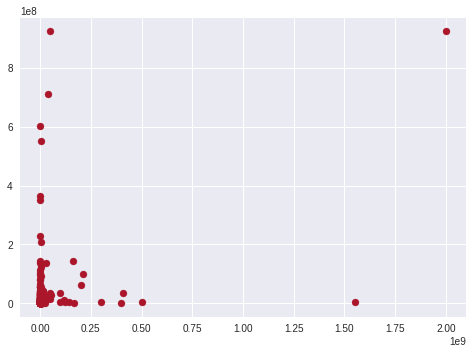

In [153]:
from sklearn import metrics

rf_val_mae = metrics.mean_absolute_error(y_test, rf_pred)

print("Validation MAE for Random Forest Model:", round(rf_val_mae))


plt.scatter(y_test, rf_pred);



#### Comparison of results

In [154]:
# Comparison
comparison = {"Actual":round(y_test), "Random Forest Prediction":rf_pred}
comparison_df = pd.DataFrame(comparison)
comparison_df["Random Forest Prediction"] = round(comparison_df["Random Forest Prediction"])
comparison_df["diff"] = round(abs(comparison_df["Actual"] - comparison_df["Random Forest Prediction"]))
print("Difference mean {}".format(comparison_df['diff'].mean()))
comparison_df

Difference mean 2864409.7788099977


,Actual,Random Forest Prediction,diff
19311,0.0,108363.0,108363.0
54863,0.0,6902.0,6902.0
74530,1000.0,32235.0,31235.0
60422,0.0,46810.0,46810.0
33756,5000.0,1385.0,3615.0
...,...,...,...
25847,1000000.0,167150.0,832850.0
50336,3000.0,59278.0,56278.0
33099,0.0,476650.0,476650.0
17904,6800000.0,933940.0,5866060.0


#### Predicting a Tornado Damage

In [157]:
new_tornado_dict = {"TOR_WIDTH":[1],"TOR_LENGTH":[1],"SCALE_EF0":[1],"SCALE_EF1":[0],"SCALE_EF2":[0],"SCALE_EF3":[0],"SCALE_EF4":[0],"SCALE_EF5":[0],"SCALE_EFU":[0]}
new_tornado_df = pd.DataFrame(new_tornado_dict)
tornado_damage_pred = rf_model.predict(new_tornado_df)
tornado_damage_pred


array([25530.95238095])

## Results


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,YEAR,...,MAGNITUDE_TYPE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,FATALITY_ID,FATALITY_TYPE,FATALITY_DATE,FATALITY_AGE,FATALITY_SEX,FATALITY_LOCATION
0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,1950,...,NaN,F3,3.4,400.0,NaN,NaN,NaN,NaN,NaN,NaN
1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,1950,...,NaN,F1,11.5,200.0,NaN,NaN,NaN,NaN,NaN,NaN
2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,1950,...,NaN,F2,12.9,33.0,NaN,NaN,NaN,NaN,NaN,NaN
3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,1950,...,NaN,F2,0.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,1950,...,NaN,F0,0.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN


## Insights

## References

* DOC/NOAA/NESDIS/NCEI > National Centers for Environmental Information, NESDIS, NOAA, U.S. Department of Commerce
* The Severe Weather Data Inventory (SWDI): a Geospatial Database of Severe Weather Data at the NOAA National Centers for Environmental Information (NCEI)
